In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [20]:
df = pd.read_csv('/content/gender-classifier-DFE-791531.csv',  encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
df['gender'].value_counts()

gender
female     6700
male       6194
brand      5942
unknown    1117
Name: count, dtype: int64

In [21]:
df = df[~df['gender'].isin(['brand', 'unknown'])]
df['gender'].value_counts()

gender
female    6700
male      6194
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12991 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               12991 non-null  int64  
 1   _golden                12991 non-null  bool   
 2   _unit_state            12991 non-null  object 
 3   _trusted_judgments     12991 non-null  int64  
 4   _last_judgment_at      12955 non-null  object 
 5   gender                 12894 non-null  object 
 6   gender:confidence      12965 non-null  float64
 7   profile_yn             12991 non-null  object 
 8   profile_yn:confidence  12991 non-null  float64
 9   created                12991 non-null  object 
 10  description            11276 non-null  object 
 11  fav_number             12991 non-null  int64  
 12  gender_gold            36 non-null     object 
 13  link_color             12991 non-null  object 
 14  name                   12991 non-null  object 
 15  profile

In [7]:
df.shape

(12991, 26)

In [8]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           36
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               1715
fav_number                   0
gender_gold              12955
link_color                   0
name                         0
profile_yn_gold          12955
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              12913
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4190
user_timezone             4427
dtype: int64

In [22]:
df = df.drop('profile_yn_gold', axis = 1 )
df = df.drop('gender_gold', axis = 1 )
df = df.drop('tweet_coord', axis = 1 )

In [23]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns

for col in non_numeric_cols:
  label_encoder.fit(df[col])
  df[col] = label_encoder.transform(df[col])

In [24]:
df.drop('gender', axis = 1).fillna(df.median(), inplace=True)

In [25]:
df['gender'].value_counts()

gender
0    6700
1    6194
2      97
Name: count, dtype: int64

In [26]:
df = df[df['gender'] != 2]

In [27]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,0,0,3,101,1,1.0000,1,1.0,3544,...,11329,1150,0,420,9418,110964,1,6.587300e+17,5410,46
1,815719227,0,0,3,107,1,1.0000,1,1.0,970,...,1469,2248,0,272,12794,7471,1,6.587300e+17,6099,53
2,815719228,0,0,3,110,1,0.6625,1,1.0,2607,...,9909,10131,1,272,12012,5617,1,6.587300e+17,5037,26
3,815719229,0,0,3,87,1,1.0000,1,1.0,8066,...,7993,439,0,272,6324,1693,1,6.587300e+17,3401,112
4,815719230,0,0,3,212,0,1.0000,1,1.0,6165,...,6079,2592,0,0,11025,31462,1,6.587300e+17,6099,148


In [28]:
df['gender'].value_counts()

gender
0    6700
1    6194
Name: count, dtype: int64

In [29]:
df.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
dtype: int64

In [32]:
df.mean()

_unit_id                  8.157298e+08
_golden                   2.791996e-03
_unit_state               2.791996e-03
_trusted_judgments        3.690631e+00
_last_judgment_at         1.410534e+02
gender                    4.803785e-01
gender:confidence         9.161536e-01
profile_yn                1.000000e+00
profile_yn:confidence     9.948403e-01
created                   6.167989e+03
description               6.070209e+03
fav_number                5.475316e+03
link_color                6.542143e+02
name                      6.176761e+03
profileimage              6.109852e+03
retweet_count             6.700791e-02
sidebar_color             2.402147e+02
text                      6.401940e+03
tweet_count               2.945312e+04
tweet_created             2.193889e+00
tweet_id                  6.587354e+17
tweet_location            3.976759e+03
user_timezone             9.506600e+01
_last_judgment_at_cat              NaN
_last_judgment_minutes             NaN
dtype: float64

In [99]:
X = df.drop(['gender'], axis=1)
column = X.columns
y = df['gender']

In [100]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X = mmsc.fit_transform(X)
X = pd.DataFrame(X, columns = column)
X.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn:confidence,created,description,fav_number,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,0.000000,0.0,0.0,0.0,0.359431,1.000000,1.0,0.287080,0.829775,0.000000,...,0.914219,0.093534,0.000000,1.000000,0.734633,0.041401,0.25,0.0,0.887031,0.310811
1,0.000026,0.0,0.0,0.0,0.380783,1.000000,1.0,0.078574,0.399273,0.000199,...,0.118544,0.182839,0.000000,0.647619,0.997972,0.002787,0.25,0.0,1.000000,0.358108
2,0.000052,0.0,0.0,0.0,0.391459,0.503238,1.0,0.211179,0.863615,0.022528,...,0.799629,0.823993,0.006536,0.647619,0.936973,0.002095,0.25,0.0,0.825873,0.175676
3,0.000077,0.0,0.0,0.0,0.309609,1.000000,1.0,0.653382,0.507504,0.000591,...,0.645013,0.035706,0.000000,0.647619,0.493292,0.000631,0.25,0.0,0.557632,0.756757
4,0.000103,0.0,0.0,0.0,0.754448,1.000000,1.0,0.499392,0.602592,0.109238,...,0.490558,0.210817,0.000000,0.000000,0.859984,0.011738,0.25,0.0,1.000000,1.000000


In [101]:
X.describe(include ="all")

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn:confidence,created,description,fav_number,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
count,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,...,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000,12894.000000
mean,0.272025,0.002792,0.002792,0.002548,0.501970,0.876588,0.986025,0.499635,0.565881,0.016027,...,0.498447,0.496938,0.000438,0.571940,0.499371,0.010989,0.548472,0.544672,0.652035,0.642338
std,0.159707,0.052768,0.052768,0.048218,0.253286,0.243440,0.111954,0.288688,0.319124,0.038400,...,0.289171,0.290856,0.009963,0.346611,0.287108,0.026387,0.334266,0.498020,0.328347,0.323578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.123049,0.000000,0.000000,0.000000,0.298932,1.000000,1.000000,0.249170,0.286776,0.000401,...,0.248326,0.244185,0.000000,0.392857,0.252906,0.000848,0.250000,0.000000,0.377644,0.358108
50%,0.283831,0.000000,0.000000,0.000000,0.483986,1.000000,1.000000,0.498501,0.578027,0.003296,...,0.498346,0.496584,0.000000,0.647619,0.494969,0.003472,0.750000,1.000000,0.702328,0.756757
75%,0.407486,0.000000,0.000000,0.000000,0.729537,1.000000,1.000000,0.750000,0.865922,0.014509,...,0.749011,0.749065,0.000000,0.833333,0.747016,0.011281,0.750000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'link_color', 'name', 'profileimage', 'retweet_count', 'sidebar_color',
       'text', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],
      dtype='object')

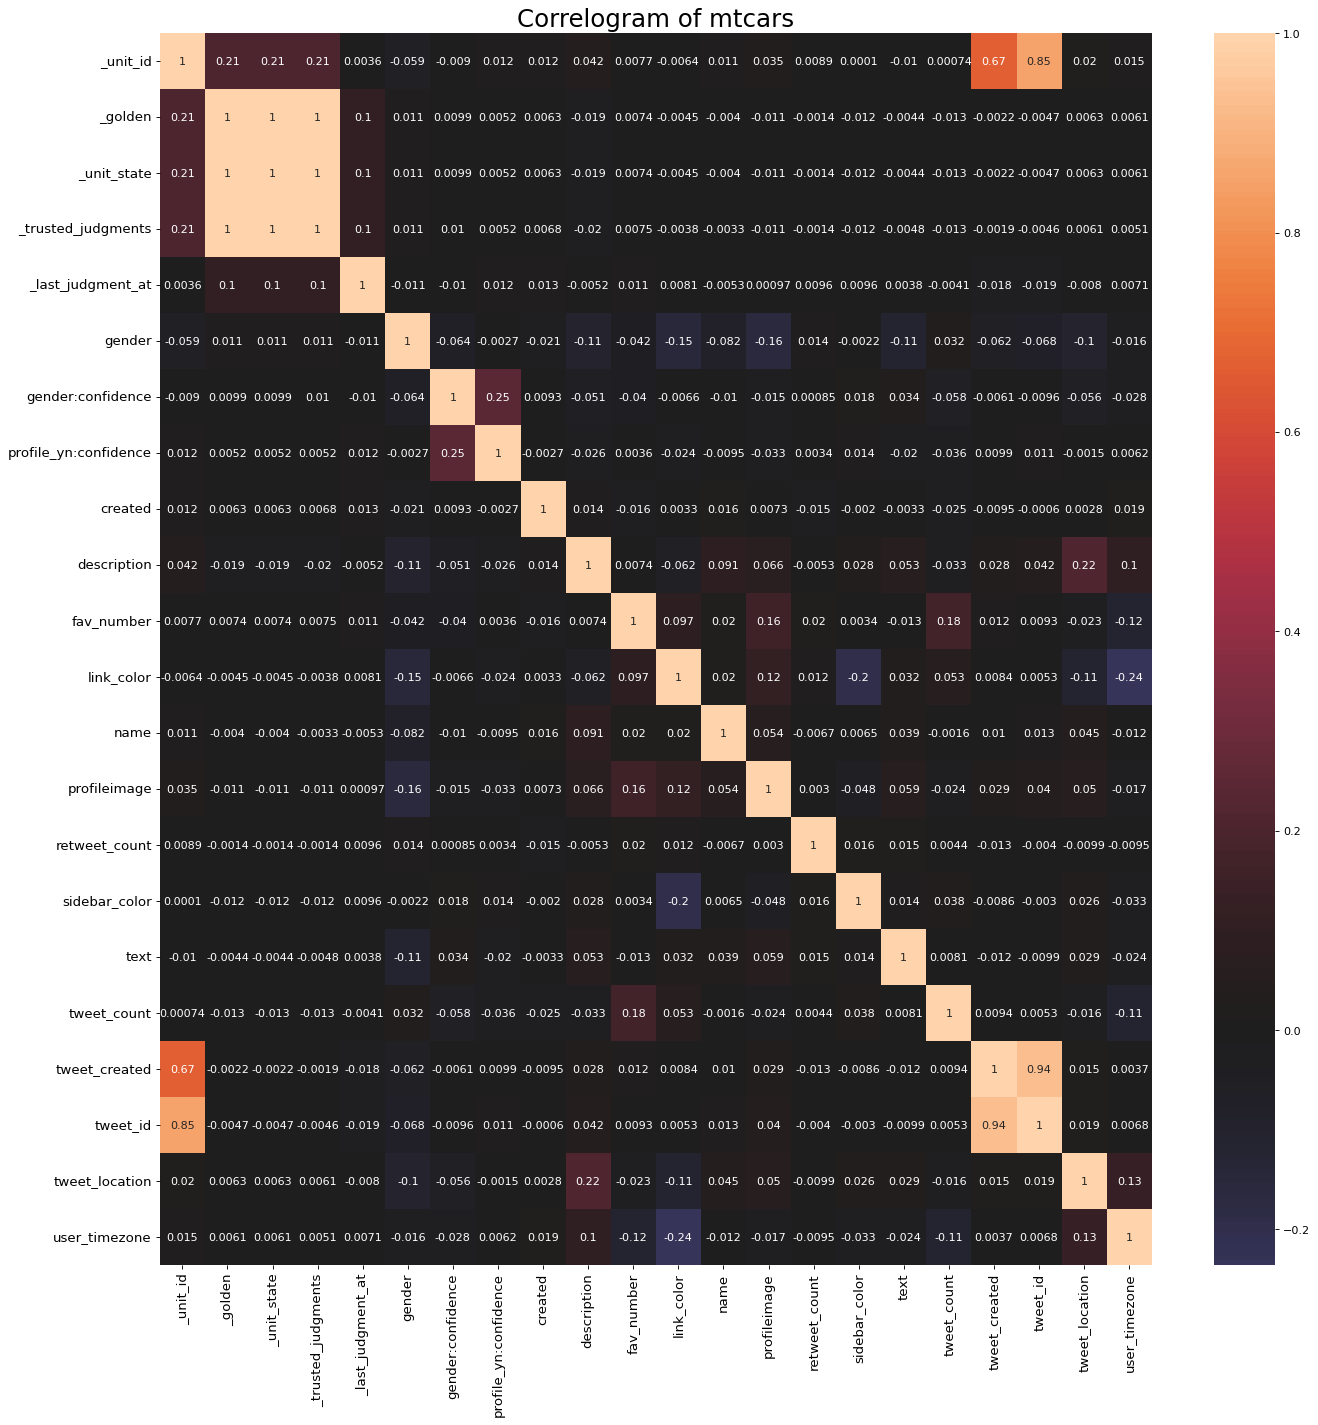

In [104]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
X = X.drop('_unit_id', axis=1)
X = X.drop('_golden', axis=1)
X = X.drop('_unit_state', axis=1)
X = X.drop('_trusted_judgments', axis=1)
X = X.drop('_last_judgment_at', axis=1)
X = X.drop('gender:confidence', axis=1)
X = X.drop('fav_number', axis=1)
X = X.drop('link_color', axis=1)
X = X.drop('name', axis=1)
X = X.drop('profileimage', axis=1)
X = X.drop('tweet_count', axis=1)
X = X.drop('tweet_created', axis=1)
X = X.drop('tweet_id', axis=1)
X = X.drop('user_timezone', axis=1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12894 entries, 0 to 20049
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               12894 non-null  int64  
 1   _golden                12894 non-null  int64  
 2   _unit_state            12894 non-null  int64  
 3   _trusted_judgments     12894 non-null  int64  
 4   _last_judgment_at      12894 non-null  int64  
 5   gender                 12894 non-null  int64  
 6   gender:confidence      12894 non-null  float64
 7   profile_yn:confidence  12894 non-null  float64
 8   created                12894 non-null  int64  
 9   description            12894 non-null  int64  
 10  fav_number             12894 non-null  int64  
 11  link_color             12894 non-null  int64  
 12  name                   12894 non-null  int64  
 13  profileimage           12894 non-null  int64  
 14  retweet_count          12894 non-null  int64  
 15  sidebar

In [106]:
df.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()

model.fit(X_train, y_train)

answers_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[1358,  676],
       [ 777, 1058]])

In [109]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

gender
0         2034
1         1835
Name: count, dtype: int64

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 1358
FP: 676
FN: 777
TP: 1058


In [111]:
accuracy_score(y_test, answers_pred)

0.6244507624709227

In [112]:
recall_score(y_test, answers_pred)

0.576566757493188

In [113]:
precision_score(y_test, answers_pred)

0.6101499423298731

In [114]:
f1_score(y_test, answers_pred)

0.5928831605491734

In [115]:
X

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn:confidence,created,description,fav_number,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,0.000000,0.0,0.0,0.000000,0.359431,1.000000,1.0,0.287080,0.829775,0.000000,...,0.914219,0.093534,0.000000,1.000000,0.734633,0.041401,0.25,0.0,0.887031,0.310811
1,0.000026,0.0,0.0,0.000000,0.380783,1.000000,1.0,0.078574,0.399273,0.000199,...,0.118544,0.182839,0.000000,0.647619,0.997972,0.002787,0.25,0.0,1.000000,0.358108
2,0.000052,0.0,0.0,0.000000,0.391459,0.503238,1.0,0.211179,0.863615,0.022528,...,0.799629,0.823993,0.006536,0.647619,0.936973,0.002095,0.25,0.0,0.825873,0.175676
3,0.000077,0.0,0.0,0.000000,0.309609,1.000000,1.0,0.653382,0.507504,0.000591,...,0.645013,0.035706,0.000000,0.647619,0.493292,0.000631,0.25,0.0,0.557632,0.756757
4,0.000103,0.0,0.0,0.000000,0.754448,1.000000,1.0,0.499392,0.602592,0.109238,...,0.490558,0.210817,0.000000,0.000000,0.859984,0.011738,0.25,0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,0.989344,1.0,1.0,0.944649,1.000000,1.000000,1.0,0.899959,0.034492,0.000884,...,0.595142,0.787312,0.000000,0.647619,0.290952,0.000292,1.00,1.0,0.745532,1.000000
12890,0.992157,1.0,1.0,0.904059,1.000000,1.000000,1.0,0.841960,0.721730,0.007356,...,0.057618,0.432208,0.000000,0.000000,0.475039,0.005045,0.25,0.0,0.377767,1.000000
12891,0.996001,1.0,1.0,0.963100,1.000000,1.000000,1.0,0.978696,0.019763,0.000146,...,0.886620,0.715169,0.000000,0.647619,0.904758,0.009857,1.00,1.0,0.396950,1.000000
12892,0.998349,1.0,1.0,0.911439,1.000000,0.777598,1.0,0.223572,0.122588,0.207259,...,0.555520,0.851403,0.000000,0.000000,0.236661,0.020921,0.25,0.0,0.695852,1.000000


In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

answers_pred = model1.predict(X_test)

In [131]:
confusion_matrix(y_test, answers_pred)

array([[1158,  894],
       [ 830,  987]])

In [132]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 1158
FP: 894
FN: 830
TP: 987


In [133]:
accuracy_score(y_test, answers_pred)

0.5544068234685965

In [127]:
recall_score(y_test, answers_pred)

0.5659251220835594

In [128]:
precision_score(y_test, answers_pred)

0.5571581196581197

In [129]:
f1_score(y_test, answers_pred)

0.5615074024226111